## Declaração de biblioteca e outras configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec

from sklearn.mixture import GaussianMixture

import csv

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções usadas no método

In [2]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

#Distribuição gaussiana multivarada
def multivariate_gaussian(x, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    fator = 1 / np.sqrt((2*np.pi)**n * Sigma_det)
    expo =  ( ((x-mu).T).dot( Sigma_inv ) ).dot(x-mu)
    return np.exp(-0.5*expo) / fator


#Inicialização dos lambdas
def init_lambda(xD,mu,sigm):
    m,_ = xD.shape
    _,c = mu.shape
    lamb = np.zeros((c))
    for ind in range(c):
        for i in range(m):
            lamb[int(ind)] += multivariate_gaussian(xD[i,:], mu[:,int(ind)], sigm[:,:,int(ind)])

    lamb[:] /= np.sum(lamb)
    return lamb


#Inicialização dos parametros
def init_pars_gmm(data,labels):
    _,n = data.shape
    c = len(np.unique(labels))

    #Instanciação das variáveis associadas aos parâmetros dos modelo
    mu = np.ndarray((n,c))     #vetores médio
    sigm = np.ndarray((n,n,c)) #matrizes de coveriância

    for ind in np.unique(labels):
        pos = np.where(labels == ind)
        mu[:,int(ind)] = np.mean( data[pos,:].reshape((len(pos[0]),n))  , axis=0)
        sigm[:,:,int(ind)] = np.cov(data[pos,:].reshape((len(pos[0]),n)) , rowvar=False)
    return mu, sigm

## Leitura dos dados (início do experimento)

In [3]:
#Arquivos com informações de treinamento e avaliação
path_data_Rotulado = 'simTreino.txt'
path_data_naoRotulado = 'simNaoRotulado.txt'

yD,xD = read_class_data(path_data_Rotulado)    #Dados de treinamento
yI,xI = read_class_data(path_data_naoRotulado) #Dados de avaliação

data = np.append(xD,xI,axis=0) #Junção dos dados em um único conjunto

## Inicialização dos parâmetros e treinamento do GMM

In [4]:
muInit, sigmaInit = init_pars_gmm(xD,yD)
lamb = init_lambda(xD,muInit,sigmaInit)

G = GaussianMixture(n_components=len(np.unique(yD)),
                    means_init=muInit.T,weights_init=lamb,
                    covariance_type='full',random_state=0)

G.fit(data)
predProb = G.predict_proba(data)
pred = np.argmax(G.predict_proba(data),axis=1)
predI = np.argmax(G.predict_proba(xI),axis=1)
predD = np.argmax(G.predict_proba(xD),axis=1)

#Cálculo da acurácia
acuracia = np.count_nonzero( np.where( np.array(predI) == yI ) )/yI.shape[0]
print('Acurácia: ',acuracia)

Acurácia:  0.8642857142857143


## Gráficos de saída

[]

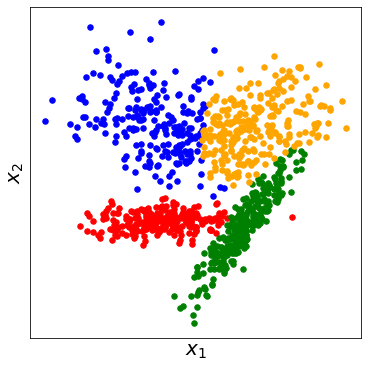

In [5]:
marr = ['o','s','^','D']
cores = ['red','blue','green','orange'] #Deve ser compatível com o número de classes

FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráfico...
ax = fig.add_subplot(spec[0,0])
for i in range(0,len(np.unique(yD))):
    pos = (np.where( np.array(pred) == i))[0]
    ax.scatter(data[pos, 0], data[pos, 1], marker='o', c=cores[i], s=30)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_xticks([])
ax.set_yticks([])

In [ ]:






FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

cores = ['red','blue','green','orange']
marcador = ['o','+','^','*']

#Subgráfico...
ax = fig.add_subplot(spec[0,0])
for i in range( muInit.shape[1] ):
    pos = (np.where( np.array(predI) == i))[0]
    ax.scatter(xI[pos, 0], xI[pos, 1], marker='o', c=cores[i], s=30)
    
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
#ax.set(xlim=(-9, 5), ylim=(-13, 6))

plt.savefig(path_out,dpi=300)
plt.show()



print(1)

## Configuração do método

In [ ]:
k = 3 #numero de componentes
m = data.shape[1]   #número de observações
dim = data.shape[0] #dimensão do espaço de atributos
epsilon = 0.001

In [ ]:
gmix = mixture.GaussianMixture(n_components=2, covariance_type='full')
gmix.fit(rand(10, 2))  # Now it thinks it is trained
gmix.weights_ = weights   # mixture weights (n_components,) 
gmix.means_ = mu          # mixture means (n_components, 2) 
gmix.covariances_ = sigma  # mixture cov (n_components, 2, 2)
x = gmix.sample(1000)  # Should work now

## Execução do método (GMM+EM)

In [ ]:

    






lamb = np.zeros(k) + (1/k) #inicialização dos lambdas

mu = np.ndarray((dim,k)) #inicializacao dos 'mus' [usando matriz]
for j in range(0,k):
    mu[:,j] = data[:,  np.random.randint(0,m, size=1)[0]]

sigm = np.ndarray((dim,dim,k)) #inicializacao dos 'sigmas'
for j in range(0,k):
    for i in range(0,m):
        sigm[:,:,j] += (1/m) * np.dot( np.array( [data[:,i] - mu[:,j]] ).T  , np.array( [data[:,i] - mu[:,j]] ) )

W = np.ndarray((m,k)) #matriz de pertinencia...
logVer = log_likelihood(data,lamb,mu,sigm)


while True:  #inicio do processo iterativo ("while True para simular um laço do-while")

    #armazenando para verificacao de convergencia
    lamb_old = np.copy(lamb); mu_old = np.copy(mu)
    sigm_old = np.copy(sigm); logVer_old = logVer

    ##Passo E: -----------------------------------------

    #calculo das pertinencias
    for i in range(0,m):

        denominador  = 0
        for l in range(0,k):
            denominador += lamb[l] * multivariate_gaussian(data[:,i],mu[:,l],sigm[:,:,l])
    
        for j in range(0,k):    
            W[i,j] = (lamb[j] * multivariate_gaussian(data[:,i],mu[:,j],sigm[:,:,j]) ) / denominador



    ##Passo M: -----------------------------------------

    #atualizacao dos lambdas...
    for j in range(0,k):
        lamb[j] = np.sum(W[:,j]) / m

    #atualizacao dos mus
    for j in range(0,k):
        for d in range(0,dim):
            mu[d,j] = ( 1 / np.sum(W[:,j]) ) * np.dot( W[:,j] , data[d,:] )

    #atualizacao dos sigmas
    sigm = sigm[:,:,:] * 0
    for j in range(0,k):
        fator = ( 1 / np.sum(W[:,j]) )
        for i in range(0,m):
            sigm[:,:,j] +=  np.dot( np.array(  [W[i,j]*(data[:,i] - mu[:,j])] ).T  , np.array( [data[:,i] - mu[:,j]] ) )
        sigm[:,:,j] *= fator


    #verificacao de convergencia
    logVer = log_likelihood(data,lamb,mu,sigm)

    print( np.abs( logVer - logVer_old) )

    if np.abs( logVer - logVer_old ) < epsilon:
        break

## Aplicação do modelo obtido

In [ ]:
N = 100
x1min = -6; x1max = 6
x2min = -6; x2max = 6

pxw1 = np.zeros((N,N)) #Função de verossimilhança da classe 1
pxw2 = np.zeros((N,N)) #Iden para classe 2

prod_pxw1 = np.zeros((N,N)) #Produto das funções de verossimilhança da classe 1
prod_pxw2 = np.zeros((N,N)) #Iden para classe 2

#Útil o experimento e para os gráficos a seguir
X1, X2 = np.meshgrid(np.linspace(x1min, x1max, N), np.linspace(x2min, x2max, N))

Z = np.ndarray((num,num))
Z2 = np.ndarray((num,num))
for i in range(0,num):
    for j in range(0,num):
        Z[i,j] = gmm_model( [X1[i,j], X2[i,j]] ,lamb,mu,sigm)

## Resultados dos métodos MAP e NavieBayes

In [ ]:
path_out = '/home/rogerio/GIT/rp/author/figs/Cap1/Exp_GMM-EM.png'

FS = (15,10) #Tamanho da figura a ser gerada
props = dict(boxstyle='round', facecolor='white', alpha=0.75)


fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=3, figure=fig)


# Subplot 1 ------------------------
ax1 = fig.add_subplot(spec[0, 0])
ax1.scatter(data[0,:],data[1,:], marker='o', color='green', s=40, alpha=0.5)
ax1.set_xlabel('$x_1$', fontsize=18)
ax1.set_ylabel('$x_2$', fontsize=18)
ax1.set_xlim(-4.5, 4.5)
ax1.set_ylim(-4.5, 4.5)


# Subplot 2 ------------------------
ax2 = fig.add_subplot(spec[1, 0],projection='3d')
ax2.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.25, antialiased=True,cmap=cm.coolwarm, edgecolors='k',alpha=0.5)
ax2.w_xaxis.set_pane_color((0.75, 0.75, 0.75, 0.75))
ax2.w_yaxis.set_pane_color((0.75, 0.75, 0.75, 0.75))
ax2.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))
ax2.set_xlabel('$x_1$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)


# Subplot 3 ------------------------
ax3 = fig.add_subplot(spec[2, 0])
g1 = ax3.contourf(vX, vY, Z, cmap=cm.RdBu)
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
fig.colorbar(g1, orientation="vertical", label= r'$\widehat{p}(\mathbf{x})$')
ax3.text(-2.2, 3.5, r'$k=3$', fontsize=16, ha="right", va="top", bbox=props)


plt.savefig(path_out, dpi=300)

plt.show()

print(1)